In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
from sklearn.grid_search import (GridSearchCV, RandomizedSearchCV)
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

In [3]:
def read_csv(day_trade):
    data_up = []
    data_down = []
    path = '/home/rory/SGX-OrderBook-Tick-Data-Trading-Strategy/Train_Test_Data/ML_data_2014'
    for j,i in enumerate(day_trade):
        for k in range(0,len(i),1):
            path_up = path + '_' + str(j+1) + '_' + str(i[k]) + '_' + 'UP' + '.csv'
            path_down = path + '_' + str(j+1) + '_' + str(i[k]) + '_' + 'DOWN' + '.csv'
            data_up.append(pd.read_csv(path_up))
            data_down.append(pd.read_csv(path_down))
            #print path_down
    return data_up,data_down

In [4]:
day_trade = [[2,3,6,7,8,10,13,14,15,16]]#,17,20,21,22,23,24,27,28,29,30],\
             #[7,10,11,12,13,17,18,19,21,24,25,26,27],\
             #[3,4,5,6,7,10,11,13,14,17,18,19,20,24,25,26,27,31]]

In [5]:
data_2014_up, data_2014_down = read_csv(day_trade)

In [25]:
latest_sec = 60 * 30
pred_sec = 10

Accuracy_Mean_Day = []
Accuracy_Std_Day = []
Feature_Importance = []
Feature_Importance_Day_one = []
Feature_Importance_Day_two = []
Feature_Importance_Day_three = []
Feature_Importance_Day_four = []
Feature_Importance_Day_five = []
Predict_Values_Day = []

for day in range(0,1,1):
    Accuracy = []
    Feature_Importance_one = []
    Feature_Importance_two = []
    Feature_Importance_three = []
    Feature_Importance_four = []
    Feature_Importance_five = []
    predict_values = []
    CV_acc = []
    for i in range(0,9000-latest_sec-pred_sec,pred_sec):

        print '----------------------------Rolling Window Time = %s----------------------------'%(i/pred_sec)
        data_train = data_2014_up[day][i:i+latest_sec]
        X_train = data_train.drop(["0"],axis=1)
        y_train = data_train['0']

        data_test = data_2014_up[day][i+latest_sec:i+latest_sec+pred_sec]
        X_test = data_test.drop(["0"],axis=1)
        y_test = data_test['0']

        # hyper-parameter
        num_trees = [10]
        max_depth = [10]
        criterion = ['entropy']
        min_samples_leaf = [5,10]
        min_samples_split = [2,30]
        max_features = [None]

        # cv
        model_grid = {'max_features':max_features,'n_estimators':num_trees,'max_depth':max_depth,\
                      'min_samples_split':min_samples_split,'criterion':criterion,\
                      'min_samples_leaf':min_samples_leaf}
        
        model = ExtraTreesClassifier(random_state = 0)
        Grid = GridSearchCV(model, model_grid, cv = 5)
        %time Grid.fit(X_train,y_train) 
        print Grid.best_params_
        print 'CV Best Score = %s'%(Grid.best_score_)
        CV_acc.append(Grid.best_score_)
        # training & testing
        model.set_params(**Grid.best_params_)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print 'Prediction latest 15 second = %s'%(predictions)
        predict_values.append(predictions.tolist())
        
        acc = metrics.accuracy_score(y_test, predictions)
        print 'Accuracy = %s'%(acc)
        Accuracy.append(acc)
        feature_imp = dict(zip([i for i in range(0,64,1)],model.feature_importances_))
        
        Top_five = sorted(feature_imp.items(),key = lambda x : x[1] , reverse=True)[0:5]
        print 'Top five importance features = %s'%(Top_five)
        
        Feature_Importance_one.append(Top_five[0][0])
        Feature_Importance_two.append(Top_five[1][0])
        Feature_Importance_three.append(Top_five[2][0])
        Feature_Importance_four.append(Top_five[3][0])
        Feature_Importance_five.append(Top_five[4][0])
        
    print 'Day = %s, mean = %s, std = %s'%(day,np.mean(Accuracy),np.std(Accuracy))
    
    Accuracy_Mean_Day.append(Accuracy)
    Accuracy_Std_Day.append(Accuracy)
    Feature_Importance_Day_one.append(Feature_Importance_one)
    Feature_Importance_Day_two.append(Feature_Importance_two)
    Feature_Importance_Day_three.append(Feature_Importance_three)
    Feature_Importance_Day_four.append(Feature_Importance_four)
    Feature_Importance_Day_five.append(Feature_Importance_five)
    Predict_Values_Day.append(predict_values)
    

----------------------------Rolling Window Time = 0----------------------------
CPU times: user 976 ms, sys: 0 ns, total: 976 ms
Wall time: 1.43 s
{'min_samples_leaf': 5, 'n_estimators': 10, 'min_samples_split': 30, 'criterion': 'entropy', 'max_features': None, 'max_depth': 10}
CV Best Score = 0.737777777778
Prediction latest 15 second = [ 1.  1.  1.  1.  1.]
Accuracy = 1.0
Top five importance features = [(25, 0.10602281928070176), (24, 0.094706428159904182), (28, 0.094089155825889198), (27, 0.07343577766201545), (63, 0.041153598152775694)]
----------------------------Rolling Window Time = 1----------------------------
CPU times: user 884 ms, sys: 0 ns, total: 884 ms
Wall time: 1.05 s
{'min_samples_leaf': 5, 'n_estimators': 10, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': None, 'max_depth': 10}
CV Best Score = 0.768888888889
Prediction latest 15 second = [ 1.  1.  1.  1.  1.]
Accuracy = 1.0
Top five importance features = [(25, 0.0971847220946227), (24, 0.093932730763

In [32]:
np.array(Accuracy_Mean_Day).mean(axis=1),np.array(Accuracy_Mean_Day).std(axis=1)

(array([ 0.94440584]), array([ 0.19030071]))

In [51]:
mean(np.array(Accuracy_Mean_Day).mean(axis=1))

0.9444058373870744

(-0.5, 1.5)

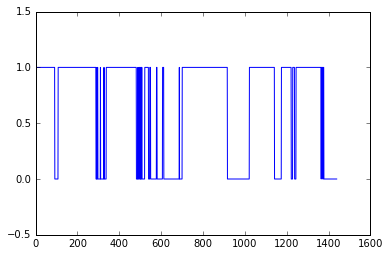

In [50]:
plot(data_2014_up[0]['0'][1800::5].values)
plt.ylim(-0.5,1.5)

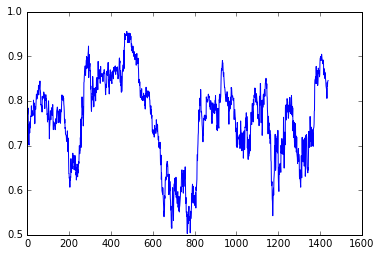

In [35]:
plot(CV_acc)

(-0.5, 1.5)

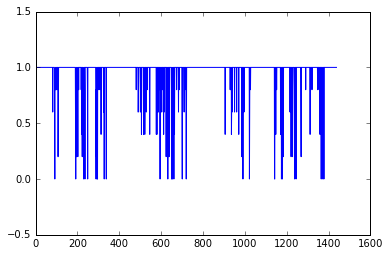

In [42]:
plot(Accuracy)
plt.ylim(-0.5,1.5)

In [38]:
predict_values

[[1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0

In [27]:
confusion_matrix(y_test,predictions)

NameError: name 'confusion_matrix' is not defined

In [125]:
pd.crosstab(y_test,predictions,rownames = ['actual'],colnames=['preds'])

preds,1.0
actual,
1.0,5


In [44]:
latest_sec = 60 * 35
pred_sec = 15


Precision_Mean_Day = []
Precision_Std_Day = []
Feature_Importance = []
Feature_Importance_Day_one = []
Feature_Importance_Day_two = []
Feature_Importance_Day_three = []
Feature_Importance_Day_four = []
Feature_Importance_Day_five = []
Predict_Values_Day = []
True_Values_Day = []

for day in range(0,10,1):
    Precision = []
    Feature_Importance_one = []
    Feature_Importance_two = []
    Feature_Importance_three = []
    Feature_Importance_four = []
    Feature_Importance_five = []
    predict_values = []
    true_values = []
    for i in range(0,9000-latest_sec-pred_sec,pred_sec):
        print '----------------------------Rolling Window Time = %s----------------------------'%(i/pred_sec)
        data_train = data_2014_up[day][i:i+latest_min]
        X_train = data_train.drop(["0"],axis=1)
        y_train = data_train['0']

        data_test = data_2014_up[day][i+latest_sec:i+latest_sec+pred_sec]
        X_test = data_test.drop(["0"],axis=1)
        y_test = data_test['0']

        # hyper-parameter
        num_trees = [10]
        max_depth = [10]
        criterion = ['entropy']
        min_samples_leaf = [5]
        min_samples_split = [2]
        max_features = [None]

        # cv
        model_grid = {'max_features':max_features,'n_estimators':num_trees,'max_depth':max_depth,\
                      'min_samples_split':min_samples_split,'criterion':criterion,\
                      'min_samples_leaf':min_samples_leaf}
        
        model = RandomForestClassifier(random_state = 0)
        Grid = GridSearchCV(model, model_grid,cv = 5,scoring = 'precision')
        Grid.fit(X_train,y_train) 
        print Grid.best_params_
        print 'CV Best Score = %s'%(Grid.best_score_)

        # training & testing
        model.set_params(**Grid.best_params_)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print 'Prediction latest 15 second = %s'%(predictions)
        predict_values.append(predictions.tolist())
        prec = metrics.precision_score(y_test, predictions)
        print 'Precision = %s'%(prec)
        Precision.append(prec)
        true_values.append(y_test.tolist())
        feature_imp = dict(zip([i for i in range(0,64,1)],model.feature_importances_))
        
        Top_five = sorted(feature_imp.items(),key = lambda x : x[1] , reverse=True)[0:5]
        print 'Top five importance features = %s'%(Top_five)
        
        Feature_Importance_one.append(Top_five[0][0])
        Feature_Importance_two.append(Top_five[1][0])
        Feature_Importance_three.append(Top_five[2][0])
        Feature_Importance_four.append(Top_five[3][0])
        Feature_Importance_five.append(Top_five[4][0])
        
    print 'Day = %s, mean = %s, std = %s'%(day,np.mean(Precision),np.std(Precision))
    Accuracy_Mean_Day.append(np.mean(Precision))
    Accuracy_Std_Day.append(np.std(Precision))
    Feature_Importance_Day_one.append(Feature_Importance_one)
    Feature_Importance_Day_two.append(Feature_Importance_two)
    Feature_Importance_Day_three.append(Feature_Importance_three)
    Feature_Importance_Day_four.append(Feature_Importance_four)
    Feature_Importance_Day_five.append(Feature_Importance_five)
    Predict_Values_Day.append(predict_values)
    

----------------------------Rolling Window Time = 0----------------------------
{'min_samples_leaf': 5, 'n_estimators': 10, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': None, 'max_depth': 10}
CV Best Score = 0.866001354116
Prediction latest 15 second = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Precision = 1.0
Top five importance features = [(26, 0.28135318632866974), (28, 0.14809374175586734), (25, 0.099954422451823371), (31, 0.090794981214531126), (36, 0.03264190338758223)]
----------------------------Rolling Window Time = 1----------------------------
{'min_samples_leaf': 5, 'n_estimators': 10, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': None, 'max_depth': 10}
CV Best Score = 0.871295801581
Prediction latest 15 second = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Precision = 1.0
Top five importance features = [(26, 0.41542656057596927), (28, 0.069637651860375668), (48, 0.053510542753711143), (25, 0.052083436

/home/bigdatas16/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


{'min_samples_leaf': 5, 'n_estimators': 10, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': None, 'max_depth': 10}
CV Best Score = 0.897355919572
Prediction latest 15 second = [ 1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  1.  0.  1.  1.]
Precision = 1.0
Top five importance features = [(24, 0.52395073860467578), (23, 0.130412812450692), (25, 0.053650538788705404), (29, 0.04028797674703477), (5, 0.032369503420124138)]
----------------------------Rolling Window Time = 17----------------------------
{'min_samples_leaf': 5, 'n_estimators': 10, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': None, 'max_depth': 10}
CV Best Score = 0.89999677829
Prediction latest 15 second = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Precision = 1.0
Top five importance features = [(24, 0.38967246317926124), (23, 0.24003634424151077), (28, 0.065529259063178913), (18, 0.041640400747271773), (25, 0.031661927109245161)]
----------------------------Rolling Window T

KeyboardInterrupt: 

In [46]:
predict_values

[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [47]:
true_values

[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.